In [ ]:
####### ANDREA MASCARI - DAVIDE PIVATO - HDA PROJECT ###################


#IMPORTS
import numpy as np
import scipy

!pip install ipython-autotime

!pip install py-ecg-detectors

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from scipy.signal import resample

# Plot packages
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
from utils import data_conv2
from google.colab import drive
from hda_utils import segment_ECG, matrix_to_signal
from scipy import signal
drive.mount('/drive')


def read_file(filename):

    data_df = pd.read_csv(filename, delimiter = '\t')

    data_df_notnan = data_df.dropna(subset = ['ECGTimestamps','ECGString'])

    ecg_signal = []
    for sample in data_df_notnan["ECGString"]:
        array_data = bytearray()
        vec = np.arange(0, len(sample), 2)

        for index in vec:
            tmp = sample[index:index + 2]
            tmp2 = int(tmp, 16)
            array_data.append(int(tmp2))

        ecg_track = data_conv2(array_data)
        ecg_signal.extend(ecg_track)


    # ECG time
    ecg_timestamps = (data_df_notnan["ECGTimestamps"] - data_df_notnan["ECGTimestamps"].iloc[0])/1000     # seconds starting from 0
    ecg_time = []

    for i in range(len(ecg_timestamps)):
        for j in range(len(ecg_track)):
            if i < len(ecg_timestamps)-1:
                sample = ecg_timestamps[i] + (ecg_timestamps[i+1] - ecg_timestamps[i])/len(ecg_track)*j
                ecg_time.append(sample)
            else: # Last segment
                sample = ecg_timestamps[i] + (ecg_timestamps[i] - ecg_timestamps[i-1])/len(ecg_track)*j
                ecg_time.append(sample)

    # PPG signal
    ppg_signal = data_df["PPGvalue"]
    oxy_time = (data_df["OXYTimestamps"] - data_df["OXYTimestamps"].iloc[0])/1000 # seconds starting from 0

    # HR signal
    hr_signal = data_df["HRvalue"]
    hr_time = (data_df["HRTimestamps"] - data_df["HRTimestamps"].iloc[0])/1000 #seconds starting from 0

    # SpO2 signal
    spo2_signal = data_df["SpO2value"]


    # PLOTS
    fig, ((ax1, ax3), (ax2, ax4)) = plt.subplots(ncols=2, nrows=2, constrained_layout=True)
    ax1.plot(oxy_time, ppg_signal, 'b')
    ax1.set_title('Raw PPG signal (whole recording)', fontsize=10)
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('PPG(%)')

    ax2.plot(oxy_time, spo2_signal, 'r')
    ax2.set_title('SpO2 signal (whole recording)', fontsize=10)
    ax2.set_xlabel('Time (s)')
    ax2.set_ylabel('SpO2(%)')

    ax3.plot(ecg_time, ecg_signal, 'g')
    ax3.set_xlabel('Time (s)')
    ax3.set_title('Raw ECG signal (whole recording)', fontsize=10)
    ax3.set_ylabel('ECG(mV)')

    ax4.plot(hr_time, hr_signal, 'k')
    ax4.set_xlabel('Time (s)')
    ax4.set_title('Heart Rate (whole recording)', fontsize=10)
    ax4.set_ylabel('bpm')

    fig.suptitle(filename, fontsize=13)

    plt.show()
    return ecg_signal

------- Andrea -----


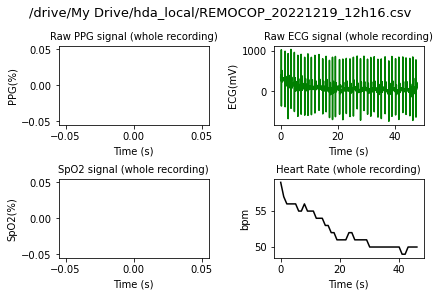

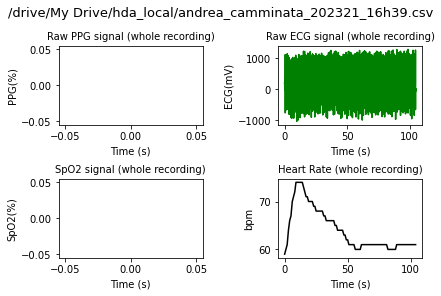

------- Davide -----


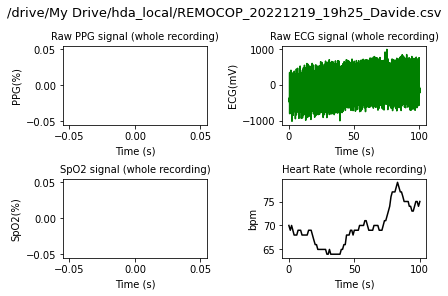

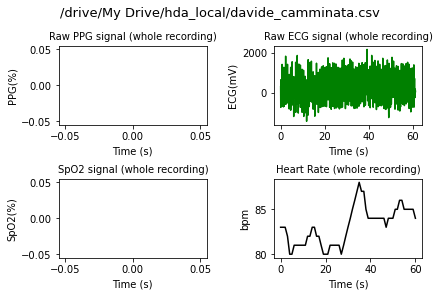

------- Emma -----


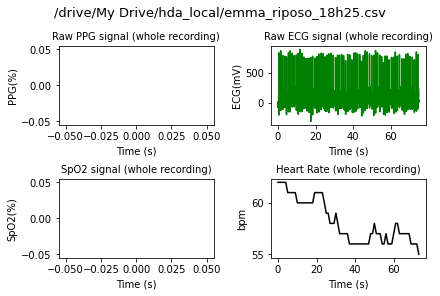

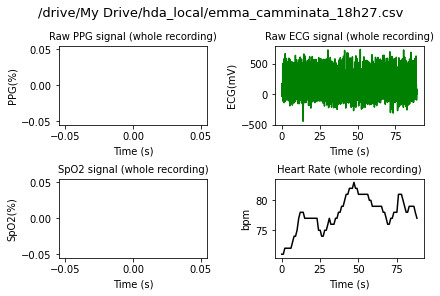

------- Mr. nicholas -----


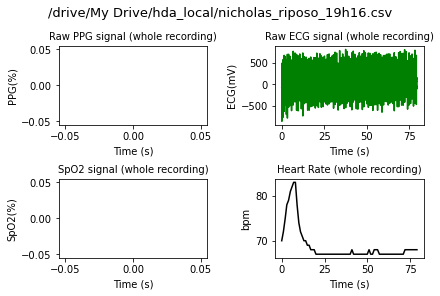

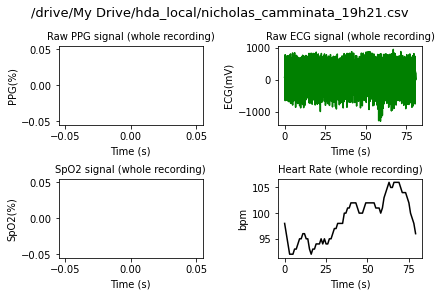

------- Alessia -----


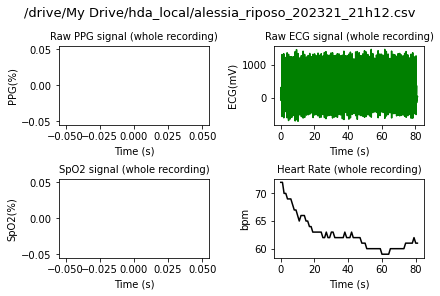

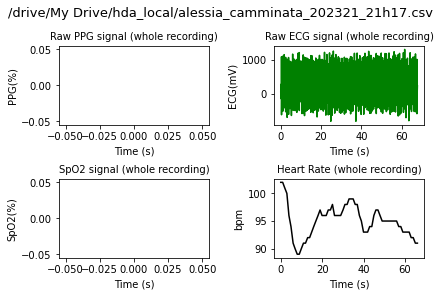

------- Francesca -----


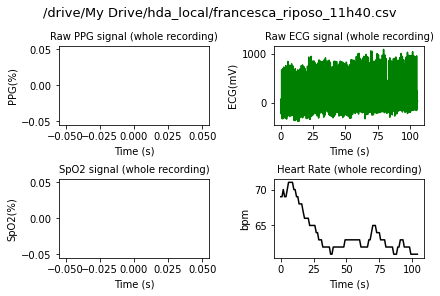

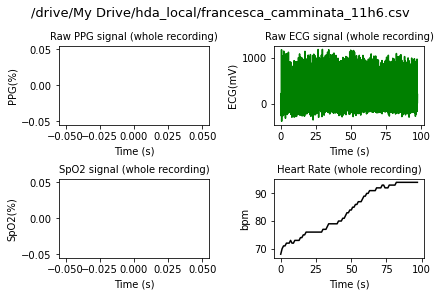

--------Michele--------


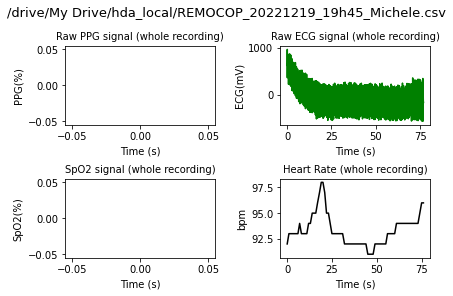

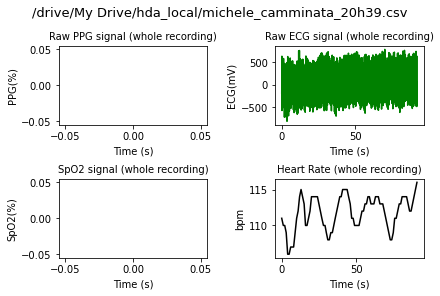

---------Andrea2--------


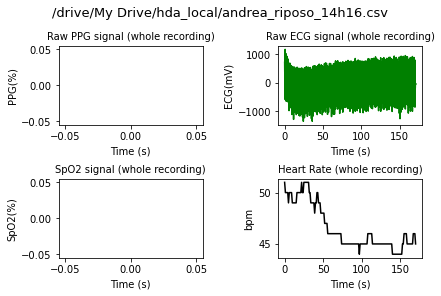

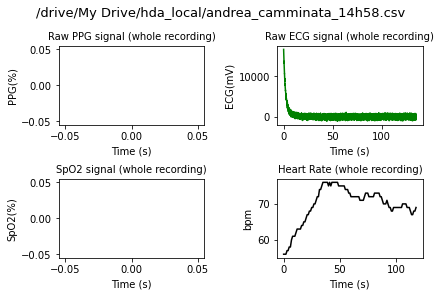

---------Davide2--------


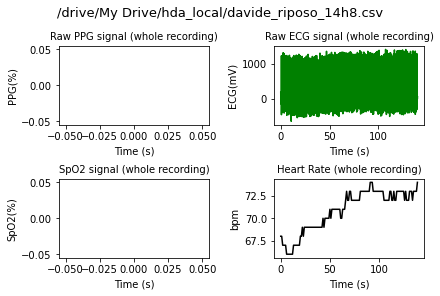

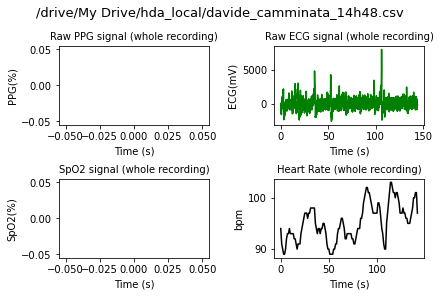

In [ ]:
print("------- Andrea -----")


ecg_signal_andrea_riposo = read_file('/drive/My Drive/hda_local/REMOCOP_20221219_12h16.csv')
ecg_signal_andrea_camminata = read_file('/drive/My Drive/hda_local/andrea_camminata_202321_16h39.csv')

print("------- Davide -----")
ecg_signal_davide_riposo = read_file('/drive/My Drive/hda_local/REMOCOP_20221219_19h25_Davide.csv')
ecg_signal_davide_camminata = read_file('/drive/My Drive/hda_local/davide_camminata.csv')

print("------- Emma -----")
ecg_signal_emma_riposo = read_file('/drive/My Drive/hda_local/emma_riposo_18h25.csv')
ecg_signal_emma_camminata = read_file('/drive/My Drive/hda_local/emma_camminata_18h27.csv')


print("------- Mr. nicholas -----")
ecg_signal_nicholas_riposo = read_file('/drive/My Drive/hda_local/nicholas_riposo_19h16.csv')
ecg_signal_nicholas_camminata = read_file('/drive/My Drive/hda_local/nicholas_camminata_19h21.csv')

print("------- Alessia -----")
ecg_signal_alessia_riposo = read_file('/drive/My Drive/hda_local/alessia_riposo_202321_21h12.csv')
ecg_signal_alessia_camminata = read_file('/drive/My Drive/hda_local/alessia_camminata_202321_21h17.csv')

print("------- Francesca -----")
ecg_signal_francesca_riposo = read_file('/drive/My Drive/hda_local/francesca_riposo_11h40.csv')
ecg_signal_francesca_camminata = read_file('/drive/My Drive/hda_local/francesca_camminata_11h6.csv')


print("--------Michele--------")
ecg_signal_michele_riposo = read_file('/drive/My Drive/hda_local/REMOCOP_20221219_19h45_Michele.csv')
ecg_signal_michele_camminata = read_file('/drive/My Drive/hda_local/michele_camminata_20h39.csv')


print("---------Andrea2--------")
ecg_signal_andrea2_riposo = read_file('/drive/My Drive/hda_local/andrea_riposo_14h16.csv')
ecg_signal_andrea2_camminata = read_file('/drive/My Drive/hda_local/andrea_camminata_14h58.csv')


print("---------Davide2--------")
ecg_signal_davide2_riposo = read_file('/drive/My Drive/hda_local/davide_riposo_14h8.csv')
ecg_signal_davide2_camminata = read_file('/drive/My Drive/hda_local/davide_camminata_14h48.csv')

In [ ]:
# ECG segmentation
def segment(ecg_signal, fs):
  ecg_signal = np.array(ecg_signal).reshape(-1,1)
  ecg_mat, r_peaks, original_len = segment_ECG(ecg_signal, fs = fs)


  # Plot segments
  fig1 = plt.figure(constrained_layout=False)
  gs = GridSpec(4, 1, figure=fig1)
  ax0 = fig1.add_subplot(gs[0, :])
  ax1 = fig1.add_subplot(gs[1, :])
  #ax2 = fig1.add_subplot(gs[2, :])




  ax0.plot(ecg_signal, 'r', zorder = 0 )
  ax0.scatter(r_peaks, list(ecg_signal[r_peaks].T[0]), zorder = 1)
  ax0.set_title('Segmented original ECG', fontsize=14)
  ax0.set_xlabel('Samples', fontsize=12)
  ax0.set_ylabel('ECG(uV)', fontsize=12)
  ax0.grid(axis='y')




  ax1.plot(ecg_mat.T)
  ax1.set_title('ECG segments', fontsize=14)
  ax1.set_xlabel('Samples', fontsize=12)
  ax1.set_ylabel('ECG(uV)', fontsize=12)
  ax1.grid(axis='y')

  plt.show()
  return ecg_mat, original_len, r_peaks

In [ ]:
import numpy as np

# standard scaling
def normalize_ecg_segment(segment):
    segment = segment - np.mean(segment)
    segment = segment / np.std(segment)

    return segment

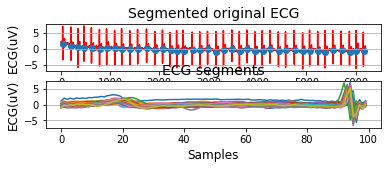

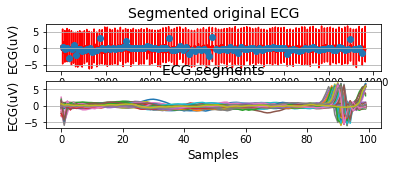

In [ ]:
ecg_signal_andrea_riposo = normalize_ecg_segment(ecg_signal_andrea_riposo)
ecg_signal_andrea_camminata = normalize_ecg_segment(ecg_signal_andrea_camminata)

mat_segment_andrea_riposo, len_andrea_riposo, peaks_andrea_riposo = segment(ecg_signal_andrea_riposo, 160)
mat_segment_andrea_camminata, len_andrea_camminata, peaks_andrea_camminata = segment(ecg_signal_andrea_camminata, 200)


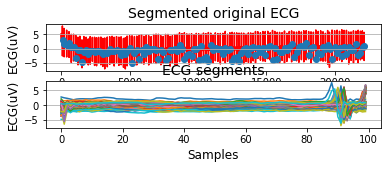

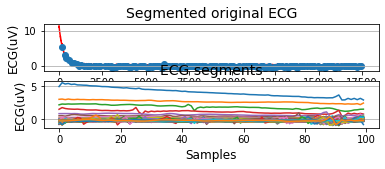

In [ ]:
ecg_signal_andrea2_riposo = normalize_ecg_segment(ecg_signal_andrea2_riposo)
ecg_signal_andrea2_camminata = normalize_ecg_segment(ecg_signal_andrea2_camminata)

mat_segment_andrea2_riposo, len_andrea2_riposo, peaks_andrea2_riposo = segment(ecg_signal_andrea2_riposo, 250)
mat_segment_andrea2_camminata, len_andrea2_camminata, peaks_andrea2_camminata = segment(ecg_signal_andrea2_camminata, 250)


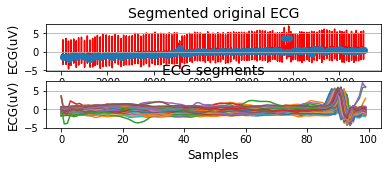

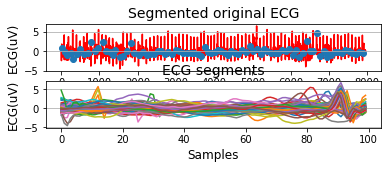

In [ ]:
ecg_signal_davide_riposo = normalize_ecg_segment(ecg_signal_davide_riposo)
ecg_signal_davide_camminata = normalize_ecg_segment(ecg_signal_davide_camminata)

mat_segment_davide_riposo, len_davide_riposo, peaks_davide_riposo = segment(ecg_signal_davide_riposo,160)
mat_segment_davide_camminata, len_davide_camminata, peaks_davide_camminata = segment(ecg_signal_davide_camminata, 130)



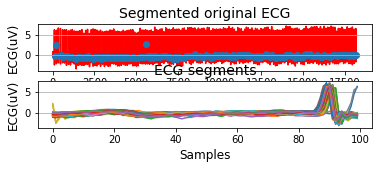

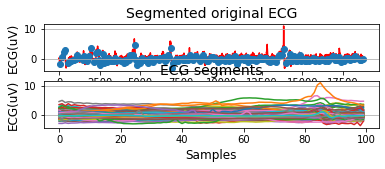

In [ ]:
ecg_signal_davide2_riposo = normalize_ecg_segment(ecg_signal_davide2_riposo)
ecg_signal_davide2_camminata = normalize_ecg_segment(ecg_signal_davide2_camminata)

mat_segment_davide2_riposo, len_davide2_riposo, peaks_davide2_riposo = segment(ecg_signal_davide2_riposo, 160)
mat_segment_davide2_camminata, len_davide2_camminata, peaks_davide2_camminata = segment(ecg_signal_davide2_camminata, 200)

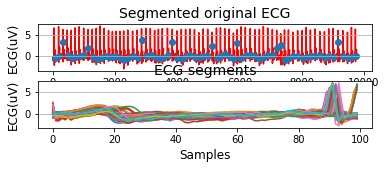

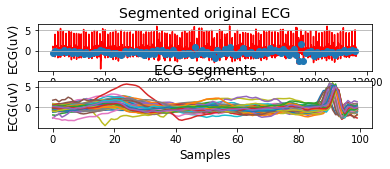

In [ ]:
ecg_signal_emma_riposo = normalize_ecg_segment(ecg_signal_emma_riposo)
ecg_signal_emma_camminata = normalize_ecg_segment(ecg_signal_emma_camminata)

mat_segment_emma_riposo, len_emma_riposo, peaks_emma_riposo = segment(ecg_signal_emma_riposo, 170)
mat_segment_emma_camminata, len_emma_camminata, peaks_emma_camminata = segment(ecg_signal_emma_camminata, 130)


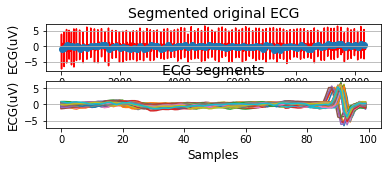

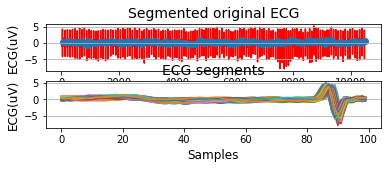

In [ ]:
ecg_signal_nicholas_riposo = normalize_ecg_segment(ecg_signal_nicholas_riposo)
ecg_signal_nicholas_camminata = normalize_ecg_segment(ecg_signal_nicholas_camminata)

mat_segment_nicholas_riposo, len_nicholas_riposo, peaks_nicholas_riposo = segment(ecg_signal_nicholas_riposo, 170)
mat_segment_nicholas_camminata, len_nicholas_camminata, peaks_nicholas_camminata = segment(ecg_signal_nicholas_camminata, 180)


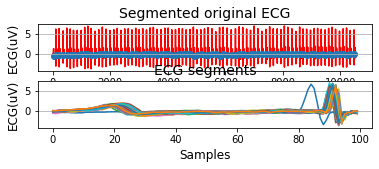

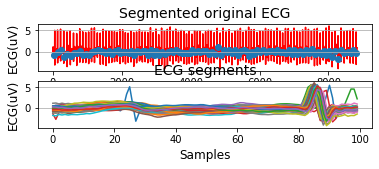

In [ ]:
ecg_signal_alessia_riposo = normalize_ecg_segment(ecg_signal_alessia_riposo)
ecg_signal_alessia_camminata = normalize_ecg_segment(ecg_signal_alessia_camminata)

mat_segment_alessia_riposo, len_alessia_riposo, peaks_alessia_riposo = segment(ecg_signal_alessia_riposo, 170)
mat_segment_alessia_camminata, len_alessia_camminata, peaks_alessia_camminata = segment(ecg_signal_alessia_camminata, 190)


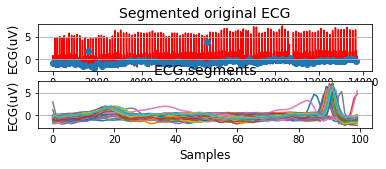

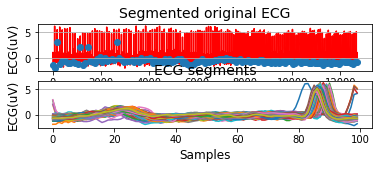

In [ ]:
ecg_signal_francesca_riposo = normalize_ecg_segment(ecg_signal_francesca_riposo)
ecg_signal_francesca_camminata = normalize_ecg_segment(ecg_signal_francesca_camminata)

mat_segment_francesca_riposo, len_francesca_riposo, peaks_francesca_riposo = segment(ecg_signal_francesca_riposo, 160)
mat_segment_francesca_camminata, len_francesca_camminata, peaks_francesca_camminata = segment(ecg_signal_francesca_camminata, 160)


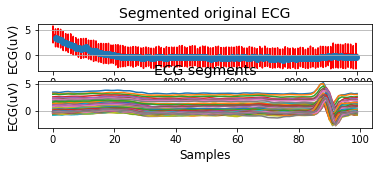

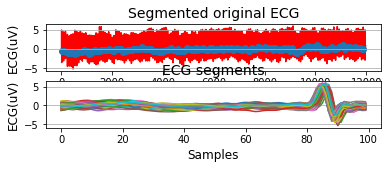

In [ ]:
ecg_signal_michele_riposo = normalize_ecg_segment(ecg_signal_michele_riposo)
ecg_signal_michele_camminata = normalize_ecg_segment(ecg_signal_michele_camminata)

mat_segment_michele_riposo, len_michele_riposo, peaks_michele_riposo = segment(ecg_signal_michele_riposo, 160)
mat_segment_michele_camminata, len_michele_camminata, peaks_michele_camminata = segment(ecg_signal_michele_camminata, 160)


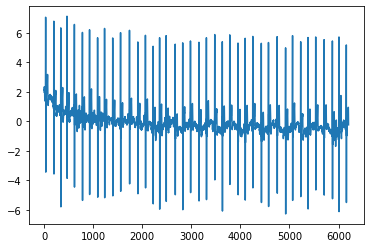

In [ ]:
plt.plot(ecg_signal_andrea_riposo[:])

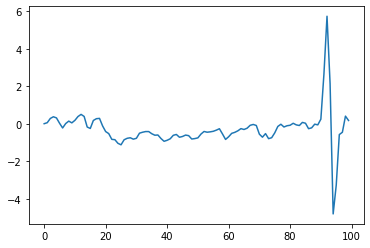

In [ ]:
plt.plot(mat_segment_nicholas_riposo.T[:, 10])

## Pre-Processing phase


In [ ]:
def create_dataset(data_dict):
  data = pd.DataFrame()
  for s in data_dict.keys():
    for a in data_dict[s].keys():
      df = pd.DataFrame(data_dict[s][a])
      df["target"] = a
      data = data.append(df, ignore_index=True)
  return data

In [ ]:
data_dict_train = {"andrea": {"riposo":mat_segment_andrea_riposo, "camminata": mat_segment_andrea_camminata},
                   "emma": {"riposo":mat_segment_emma_riposo, "camminata": mat_segment_emma_camminata},
                   "davide": {"riposo":mat_segment_davide_riposo, "camminata": mat_segment_davide_camminata},
                    "francesca": {"riposo":mat_segment_francesca_riposo, "camminata": mat_segment_francesca_camminata},
                    "alessia": {"riposo":mat_segment_alessia_riposo, "camminata": mat_segment_alessia_camminata},
                  }


data_dict_test = {
                  "michele": {"riposo":mat_segment_michele_riposo, "camminata": mat_segment_michele_camminata},
                  "nicholas": {"riposo":mat_segment_nicholas_riposo, "camminata": mat_segment_nicholas_camminata},
                  }

train = create_dataset(data_dict_train)
test = create_dataset(data_dict_test)


train.replace('riposo',0, inplace=True)
train.replace('camminata',1,inplace=True)
test.replace('riposo',0, inplace=True)
test.replace('camminata',1,inplace=True)

x_train = train.loc[:,train.columns != "target"]
x_test = test.loc[:,test.columns != "target"]

y_train = train.loc[:,train.columns == "target"]
y_test = test.loc[:,test.columns == "target"]

In [ ]:
auto_dict_train = {"andrea": {"riposo":mat_segment_andrea_riposo, "camminata": mat_segment_andrea_camminata},
                    "francesca": {"riposo":mat_segment_francesca_riposo, "camminata": mat_segment_francesca_camminata},
                    "alessia": {"riposo":mat_segment_alessia_riposo, "camminata": mat_segment_alessia_camminata},
                                       }

auto_dict_test = {
                  "michele": {"riposo":mat_segment_michele_riposo, "camminata": mat_segment_michele_camminata},
    "nicholas": {"riposo":mat_segment_nicholas_riposo, "camminata": mat_segment_nicholas_camminata},
                  }

auto_train = create_dataset(auto_dict_train)
auto_test = create_dataset(auto_dict_test)


auto_train.replace('riposo',0, inplace=True)
auto_train.replace('camminata',1,inplace=True)
auto_test.replace('riposo',0, inplace=True)
auto_test.replace('camminata',1,inplace=True)

x_train_auto = auto_train.loc[:,train.columns != "target"]
x_test_auto = auto_test.loc[:,test.columns != "target"]

y_train_auto = auto_train.loc[:,train.columns == "target"]
y_test_auto = auto_test.loc[:,test.columns == "target"]

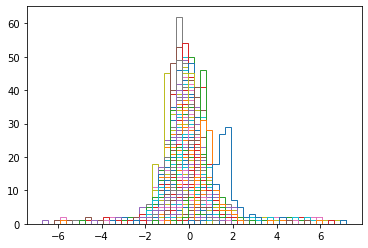

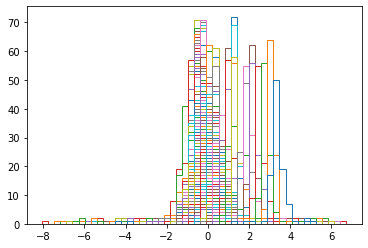

In [ ]:
plt.hist(x_train_auto, bins=50, histtype='step')
plt.show()

plt.hist(x_test_auto, bins=50, histtype='step')
plt.show()

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

def remove_outliers_knn(data, n_neighbors=5, threshold=3.0):
    nbrs = NearestNeighbors(n_neighbors=n_neighbors).fit(data)
    distances, indices = nbrs.kneighbors(data)
    mean_distance = np.mean(distances[:, -1])
    is_inlier = distances[:, -1] < threshold * mean_distance
    return data[is_inlier],  is_inlier

train_filtered_data, inlier_inds = remove_outliers_knn(x_train_auto, 2,3)
y_train_filtered = y_train_auto[inlier_inds]

test_filtered_data, inlier_inds = remove_outliers_knn(x_test_auto, 2,3)
y_test_filtered = y_test_auto[inlier_inds]

In [ ]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = sm.fit_resample(x_train_auto, y_train_auto)

print('Original dataset size: ', x_train_auto.shape[0])
print('Augmented dataset size: ', X_resampled.shape[0])

x_train_auto = X_resampled
y_train_auto = y_resampled

print('Augmented dataset size: ', x_train_auto.shape[0])

Original dataset size:  584
Augmented dataset size:  706
Augmented dataset size:  706


In [ ]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = sm.fit_resample(x_train, y_train)

print('Original dataset size: ', x_train.shape[0])
print('Augmented dataset size: ', X_resampled.shape[0])

x_train = X_resampled
y_train = y_resampled

print('Augmented dataset size: ', x_train.shape[0])

Original dataset size:  971
Augmented dataset size:  1108
Augmented dataset size:  1108


[0.2582715  0.15057505]


Train labels: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0
 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 

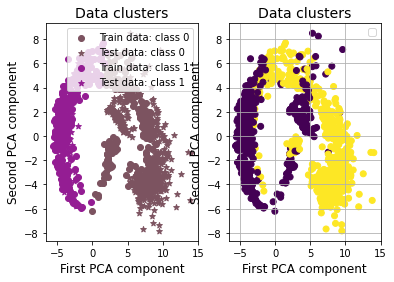

In [ ]:
num_components = 2
pca2 = PCA(n_components = 2)
pca2.fit(train.loc[:,train.columns!='target'])
print(pca2.explained_variance_ratio_)
Y_hat_train = pca2.transform(train_filtered_data)
Y_hat_test = pca2.transform(test_filtered_data)
K2 = 2
kmeans2 = KMeans(n_clusters = K2, random_state=0).fit(train_filtered_data)
train_labels = kmeans2.labels_
print("Train labels: " + str(train_labels))
test_labels = kmeans2.predict(test_filtered_data)
print("Test labels: " + str(test_labels))
print(test.loc[:,test.columns=='target'])
fig, (ax1, ax2) = plt.subplots(ncols=2)

from random import randint
colors = []

for i in range(K2):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

for l in range(K2):
    ax1.scatter(
        Y_hat_train[train_labels == l, 0],
        Y_hat_train[train_labels == l, 1],
        color=colors[l],
        label="Train data: class %s" % l,
        marker = 'o'
    )
    ax1.scatter(
        Y_hat_test[test_labels == l, 0],
        Y_hat_test[test_labels == l, 1],
        color=colors[l],
        label="Test data: class %s" % l,
        marker = '*'
    )

    ax1.legend()
    ax1.set_title("Data clusters", fontsize = 14)
    ax1.set_xlabel("First PCA component", fontsize = 12)
    ax1.set_ylabel("Second PCA component", fontsize = 12)
    ax1.grid()


ax2.scatter(
    Y_hat_train[:,0],
    Y_hat_train[:,1],
    c=np.array(y_train_filtered),
    marker = 'o',
)
ax2.scatter(
    Y_hat_test[:,0],
    Y_hat_test[:,1],
    c=np.array(y_test_filtered),
    marker = 'o'
)

ax2.legend()
ax2.set_title("Data clusters", fontsize = 14)
ax2.set_xlabel("First PCA component", fontsize = 12)
ax2.set_ylabel("Second PCA component", fontsize = 12)
ax2.grid()

## Autoencoder + Recurrent neural network



In [ ]:
#AUTOENCODER
import tensorflow as tf

input_img = tf.keras.Input(shape=(100,))
encoded = tf.keras.layers.Dense(100, activation='selu')(input_img)
encoded = tf.keras.layers.Dense(16, activation='selu')(encoded)
encoded = tf.keras.layers.Dense(8, activation='selu')(encoded)

decoded = tf.keras.layers.Dense(8, activation='selu')(encoded)
decoded = tf.keras.layers.Dense(16, activation='selu', kernel_regularizer= tf.keras.regularizers.L1(0.8), bias_regularizer= tf.keras.regularizers.L1(0.5))(decoded)
decoded = tf.keras.layers.Dense(100, activation='linear')(decoded)

autoencoder = tf.keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')


autoencoder.fit(x_train_auto,x_train_auto,
                epochs=80,
                batch_size=128,
                shuffle=False,
                validation_data=(x_test_auto, x_test_auto))

last_layer_weights = autoencoder.layers[6].get_weights()[0]
last_layer_biases  = autoencoder.layers[5].get_weights()[1]


Epoch 1/80
6/6 [==============================] - 5s 65ms/step - loss: 24.8423 - val_loss: 24.4102
Epoch 2/80
6/6 [==============================] - 0s 20ms/step - loss: 24.1394 - val_loss: 23.7343
Epoch 3/80
6/6 [==============================] - 0s 59ms/step - loss: 23.4868 - val_loss: 23.1105
Epoch 4/80
6/6 [==============================] - 0s 63ms/step - loss: 22.8636 - val_loss: 22.5003
Epoch 5/80
6/6 [==============================] - 0s 66ms/step - loss: 22.2531 - val_loss: 21.9132
Epoch 6/80
6/6 [==============================] - 0s 41ms/step - loss: 21.6583 - val_loss: 21.3337
Epoch 7/80
6/6 [==============================] - 0s 16ms/step - loss: 21.0682 - val_loss: 20.7662
Epoch 8/80
6/6 [==============================] - 0s 16ms/step - loss: 20.4927 - val_loss: 20.2067
Epoch 9/80
6/6 [==============================] - 0s 17ms/step - loss: 19.9247 - val_loss: 19.6616
Epoch 10/80
6/6 [==============================] - 0s 16ms/step - loss: 19.3689 - val_loss: 19.1265
Epoch 11/

16/16 [==============================] - 0s 2ms/step
Display original
Display reconstruction


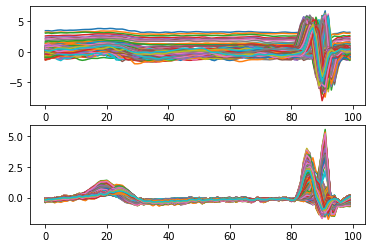

time: 1.64 s (started: 2023-02-13 19:14:58 +00:00)


In [ ]:
decoded_seg = autoencoder.predict(x_test_auto)

fig1 = plt.figure(constrained_layout=False)
gs = GridSpec(2, 1, figure=fig1)
ax0 = fig1.add_subplot(gs[0, :])
ax1 = fig1.add_subplot(gs[1, :])
print('Display original')
ax0.plot(x_test_auto.T)

print('Display reconstruction')
ax1.plot(decoded_seg.T)
plt.show()



In [ ]:
last_layer_weights = autoencoder.layers[6].get_weights()[0]
last_layer_biases  = autoencoder.layers[5].get_weights()[1]


time: 6.76 ms (started: 2023-02-13 19:15:02 +00:00)


In [ ]:
#UNDERCOMPLETE NETWORK
kernel_initializer = tf.keras.initializers.constant(last_layer_weights)
bias_initializer = tf.keras.initializers.constant(last_layer_biases)

%reload_ext autotime


model = tf.keras.Sequential( [tf.keras.layers.Dense(16, activation='relu', input_shape=(100,),kernel_initializer=kernel_initializer, bias_initializer = bias_initializer),
                              tf.keras.layers.Reshape(target_shape=(1, 16)),
                              tf.keras.layers.GRU(8),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1, activation='sigmoid')
                              ])


optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 3)
history_concate = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=120,batch_size=1024, shuffle = False,
                             callbacks=[early_stop_callback]
                            )


Epoch 1/100
2/2 [==============================] - 6s 948ms/step - loss: 0.7175 - accuracy: 0.4052 - val_loss: 0.6986 - val_accuracy: 0.4078
Epoch 2/100
2/2 [==============================] - 0s 139ms/step - loss: 0.7044 - accuracy: 0.4819 - val_loss: 0.6925 - val_accuracy: 0.4627
Epoch 3/100
2/2 [==============================] - 0s 86ms/step - loss: 0.6938 - accuracy: 0.5144 - val_loss: 0.6864 - val_accuracy: 0.4569
Epoch 4/100
2/2 [==============================] - 0s 111ms/step - loss: 0.6839 - accuracy: 0.5325 - val_loss: 0.6802 - val_accuracy: 0.4608
Epoch 5/100
2/2 [==============================] - 0s 94ms/step - loss: 0.6747 - accuracy: 0.5496 - val_loss: 0.6740 - val_accuracy: 0.4686
Epoch 6/100
2/2 [==============================] - 0s 118ms/step - loss: 0.6663 - accuracy: 0.5487 - val_loss: 0.6677 - val_accuracy: 0.4784
Epoch 7/100
2/2 [==============================] - 0s 131ms/step - loss: 0.6589 - accuracy: 0.5415 - val_loss: 0.6613 - val_accuracy: 0.4882
Epoch 8/100
2/2

In [ ]:
%reload_ext autotime


model_base = tf.keras.Sequential( [tf.keras.layers.Dense(16, activation='relu', input_shape=(100,)),
                              tf.keras.layers.Reshape(target_shape=(1, 16)),
                              tf.keras.layers.GRU(8),
                              tf.keras.layers.Flatten(),
                              tf.keras.layers.Dense(1, activation='sigmoid')
                              ])


optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model_base.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 5)
history_base= model_base.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=120,batch_size=1024, shuffle = False
                            #, callbacks=[early_stop_callback]
                            )


Epoch 1/100
2/2 [==============================] - 8s 694ms/step - loss: 0.8140 - accuracy: 0.4648 - val_loss: 0.6686 - val_accuracy: 0.6490
Epoch 2/100
2/2 [==============================] - 0s 42ms/step - loss: 0.8009 - accuracy: 0.4783 - val_loss: 0.6620 - val_accuracy: 0.6490
Epoch 3/100
2/2 [==============================] - 0s 57ms/step - loss: 0.7908 - accuracy: 0.4810 - val_loss: 0.6564 - val_accuracy: 0.6549
Epoch 4/100
2/2 [==============================] - 0s 40ms/step - loss: 0.7814 - accuracy: 0.4874 - val_loss: 0.6515 - val_accuracy: 0.6549
Epoch 5/100
2/2 [==============================] - 0s 56ms/step - loss: 0.7726 - accuracy: 0.4928 - val_loss: 0.6471 - val_accuracy: 0.6588
Epoch 6/100
2/2 [==============================] - 0s 40ms/step - loss: 0.7642 - accuracy: 0.4955 - val_loss: 0.6430 - val_accuracy: 0.6647
Epoch 7/100
2/2 [==============================] - 0s 42ms/step - loss: 0.7561 - accuracy: 0.4982 - val_loss: 0.6394 - val_accuracy: 0.6667
Epoch 8/100
2/2 [==

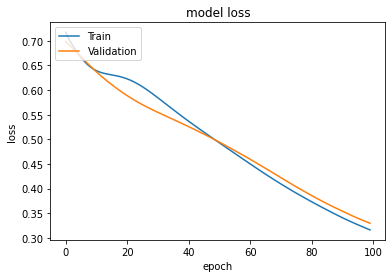

time: 35.7 s (started: 2023-02-13 19:16:20 +00:00)


In [ ]:
plt.plot(history_concate.history['loss'])
plt.plot(history_concate.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

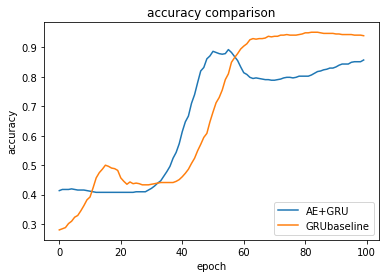

time: 164 ms (started: 2023-02-13 18:55:11 +00:00)


In [ ]:
plt.plot(history_concate.history['val_accuracy'])
plt.plot(history_base.history['val_accuracy'])
plt.title('accuracy comparison')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['AE+GRU', 'GRUbaseline'], loc='lower right')
plt.show()

In [ ]:
import time

rec = tf.keras.metrics.Recall(name = "recall")
prec = tf.keras.metrics.Precision(name = "precision")

## Convolutional neural network

In [ ]:
import tensorflow as tf

def CNN_1d(input_shape):


    X_input = tf.keras.Input(input_shape)

    X = tf.keras.layers.Conv1D(16, 9, name='conv1')(X_input)
    X = tf.keras.layers.BatchNormalization(axis=2, name='bn1')(X)
    X = tf.keras.layers.Activation('tanh')(X)
    X = tf.keras.layers.AveragePooling1D(pool_size=2)(X)
    X = tf.keras.layers.Dropout(0.5)(X)


    X = tf.keras.layers.Conv1D(8, 9, name='conv2')(X)
    X = tf.keras.layers.BatchNormalization(axis=2, )(X)
    X = tf.keras.layers.Activation('tanh')(X)

    X = tf.keras.layers.Flatten()(X)
    X = tf.keras.layers.Dropout(0.5)(X)
    X = tf.keras.layers.Dense(1, activation='sigmoid')(X)

    model = tf.keras.Model(inputs = X_input, outputs = X, name='MyModel')

    return model

time: 6.74 ms (started: 2023-02-13 19:57:24 +00:00)


In [ ]:
def CNN():

  input_shape = (x_train.shape[1], 1)

  model = CNN_1d(input_shape)
  model.compile(optimizer=tf.keras.optimizers.Adam(
      learning_rate=0.001), loss="binary_crossentropy", metrics=["accuracy",  prec, rec])

  early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 3)

  start = time.time()
  history3 = model.fit(x_train, y_train, epochs=30,
                      batch_size = 512,
                      validation_data=(x_test, y_test),
                      callbacks = [early_stop_callback],
                       verbose = 0,
                      shuffle = True)
  end = time.time()

  return history3, end-start

time: 2.98 ms (started: 2023-02-13 19:49:03 +00:00)


In [ ]:
import time
import tensorflow as tf
def AE_GRU():

  input_img = tf.keras.Input(shape=(100,))
  encoded = tf.keras.layers.Dense(100, activation='selu')(input_img)
  encoded = tf.keras.layers.Dense(16, activation='selu')(encoded)
  encoded = tf.keras.layers.Dense(8, activation='selu')(encoded)

  decoded = tf.keras.layers.Dense(8, activation='selu')(encoded)
  decoded = tf.keras.layers.Dense(16, activation='selu', kernel_regularizer= tf.keras.regularizers.L1(0.8), bias_regularizer= tf.keras.regularizers.L1(0.5))(decoded)
  decoded = tf.keras.layers.Dense(100, activation='linear')(decoded)

  autoencoder = tf.keras.Model(input_img, decoded)
  autoencoder.compile(optimizer='adam', loss='mean_squared_error')

  autoencoder.fit(x_train_auto,x_train_auto,
                  epochs=80,
                  batch_size=128,
                  verbose = 0,
                  shuffle=False,
                  validation_data=(x_test_auto, x_test_auto))

  last_layer_weights = autoencoder.layers[6].get_weights()[0]
  last_layer_biases  = autoencoder.layers[5].get_weights()[1]

  start = time.time()

  kernel_initializer = tf.keras.initializers.constant(last_layer_weights)
  bias_initializer = tf.keras.initializers.constant(last_layer_biases)

  %reload_ext autotime


  model = tf.keras.Sequential( [tf.keras.layers.Dense(16, activation='relu', input_shape=(100,),kernel_initializer=kernel_initializer, bias_initializer=bias_initializer),
                                tf.keras.layers.Reshape(target_shape=(1, 16)),
                                tf.keras.layers.GRU(8, name='gru0'),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(1, activation='sigmoid')
                                ])

  rec = tf.keras.metrics.Recall()
  prec = tf.keras.metrics.Precision()
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy',  prec, rec])
  early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 3)
  history_concate = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=120,batch_size=1024, verbose=0, shuffle = False,
                              callbacks=[early_stop_callback]
                              )

  end = time.time()

  return history_concate, end-start



time: 51.1 ms (started: 2023-02-13 19:18:29 +00:00)


In [ ]:
def GRUbaseline():

  model_base = tf.keras.Sequential( [tf.keras.layers.Dense(16, activation='relu', input_shape=(100,)),
                                tf.keras.layers.Reshape(target_shape=(1, 16)),
                                tf.keras.layers.GRU(8, name='gru0'),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(1, activation='sigmoid')
                                ])


  optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
  model_base.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy', prec, rec])
  early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 5)
  start = time.time()
  history_base= model_base.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=120,batch_size=1024, verbose = 0, shuffle = False,
                               callbacks=[early_stop_callback]
                              )
  end = time.time()
  return history_base, end-start

time: 4.76 ms (started: 2023-02-13 19:18:38 +00:00)


## Comparison of the results

In [ ]:
ae_res = []
base_res = []
cnn_res = []
ae_train = []
base_train = []
cnn_train = []
ae_prec = []
base_prec = []
cnn_prec = []
ae_rec = []
base_rec = []
cnn_rec = []
ae_time = []
base_time = []
cnn_time = []
for n in range(10):
  ae = AE_GRU()
  ae_keys = list(ae[0].history.keys())
  base = GRUbaseline()
  base_keys = list(base[0].history.keys())
  cnn = CNN()
  cnn_keys = list(cnn[0].history.keys())

  ae_res.append(ae[0].history["val_accuracy"][-1])
  base_res.append(base[0].history["val_accuracy"][-1])
  cnn_res.append(cnn[0].history["val_accuracy"][-1])

  ae_train.append(ae[0].history["accuracy"][-1])
  base_train.append(base[0].history["accuracy"][-1])
  cnn_train.append(cnn[0].history["accuracy"][-1])

  ae_prec.append(ae[0].history[ae_keys[2]][-1])
  base_prec.append(base[0].history[base_keys[2]][-1])
  cnn_prec.append(cnn[0].history[cnn_keys[2]][-1])

  ae_rec.append(ae[0].history[ae_keys[3]][-1])
  base_rec.append(base[0].history[base_keys[3]][-1])
  cnn_rec.append(cnn[0].history[cnn_keys[3]][-1])

  ae_time.append(ae[1])
  base_time.append(base[1])
  cnn_time.append(cnn[1])


print(" BASELINE RESULTS \n" )
print("accuracy:", np.mean(base_res))
print("precision:", np.mean(base_prec))
print("recall:", np.mean(base_rec))
print("std:", np.std(base_res))
print("train mean:", np.mean(base_train))
print("average time:", np.mean(base_time), "\n")
print(" AUTOENCODER + GRU RESULTS \n", )
print("accuracy:", np.mean(ae_res))
print("precision:", np.mean(ae_prec))
print("recall:", np.mean(ae_rec))
print("std:", np.std(ae_res))
print("train mean:", np.mean(ae_train))
print("average time:", np.mean(ae_time), "\n")
print(" CNN results \n", )
print("accuracy:", np.mean(cnn_res))
print("precision:", np.mean(cnn_prec))
print("recall:", np.mean(cnn_rec))
print("std:", np.std(cnn_res))
print("train mean:", np.mean(cnn_train))
print("average time:", np.mean(cnn_time))


 BASELINE RESULTS 

accuracy: 0.8996078372001648
precision: 0.9718091368675232
recall: 0.8299638986587524
std: 0.021241730226696506
train mean: 0.9029783368110657
average time: 13.204875135421753 

 AUTOENCODER + GRU RESULTS 

accuracy: 0.8747058749198914
precision: 0.9719562947750091
recall: 0.8433212995529175
std: 0.04207652771611251
train mean: 0.9095667839050293
average time: 14.11022424697876 

 CNN results 

accuracy: 0.7472549021244049
precision: 0.8214671969413757
recall: 0.7700361013412476
std: 0.007360127165793035
train mean: 0.8014440536499023
average time: 7.656037497520447
time: 35.9 s (started: 2023-02-13 20:09:23 +00:00)


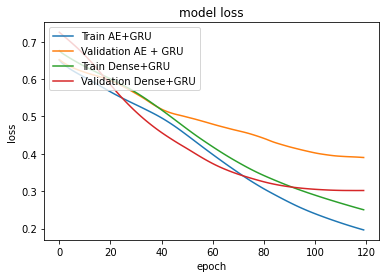

time: 25.6 s (started: 2023-02-13 20:19:38 +00:00)


In [ ]:
history1 = AE_GRU()[0]
history2 = GRUbaseline()[0]


plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train AE+GRU', 'Validation AE + GRU'], loc='upper left')
plt.show()

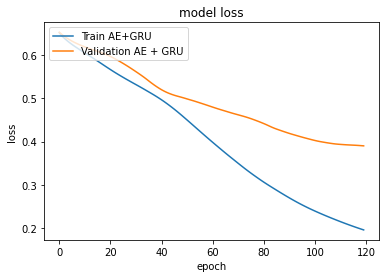

time: 381 ms (started: 2023-02-13 20:37:11 +00:00)


In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train AE+GRU', 'Validation AE + GRU'], loc='upper left')
plt.show()

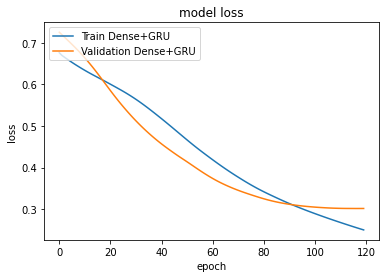

time: 177 ms (started: 2023-02-13 20:36:42 +00:00)


In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend([ "Train Dense+GRU", "Validation Dense+GRU"], loc='upper left')
plt.show()

In [ ]:
model_base = tf.keras.Sequential( [tf.keras.layers.Dense(16, activation='relu', input_shape=(100,)),
                                tf.keras.layers.Reshape(target_shape=(1, 16)),
                                tf.keras.layers.GRU(8, name='gru0'),
                                tf.keras.layers.Flatten(),
                                tf.keras.layers.Dense(1, activation='sigmoid')
                                ])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_base.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy', prec, rec])
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience = 5)
start = time.time()
history_base= model_base.fit(x_train,y_train,epochs=120,batch_size=1024, verbose = 0, shuffle = False,
                              callbacks=[early_stop_callback]
                            )


time: 10.7 s (started: 2023-02-13 20:28:30 +00:00)


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

preds = model_base.predict(x_test)

cm = confusion_matrix(y_test, np.round(preds))

print(cm)
accuracy_score(y_test, np.round(preds))

16/16 [==============================] - 1s 3ms/step
[[173  35]
 [  2 300]]


0.9274509803921569

time: 1.01 s (started: 2023-02-13 20:28:43 +00:00)
